# データ分析演習 week07 演習課題
- 氏名： 氏名に置き換えてください
- 学生番号： 学生番号に置き換えてください

## はじめに
1. このファイルの名前の(JBxxxxxx)を自分の学生番号にしてください．
2. 上記の氏名と学生番号を忘れずに記入してください．

## 提出方法
- GitHub Desktopを通じてGitHubへ提出
- 締切: **6月18日（木）**

## この演習資料の進め方
1. 教科書「東京大学のデータサインティスト育成講座」 ch2.5，および教科書サポートページからダウンロードしたノートブック（Chapter2.ipynbの2.5）を一通り学習してください．本資料前半の補足も参考にしてください．
2. 以下の演習課題を解いてください．
---

はじめに，本日の演習で使うモジュールをインポートしておきます．以下のセルを実行してください．
- 教科書とは異なり， `sns.set() ` という行を追加しています．詳しくは本日の講義資料を参照してください．

In [1]:
# Matplotlib と Seabornの読み込み
# Seabornはきれいに図示できる
import matplotlib as mpl
import seaborn as sns
import japanize_matplotlib
sns.set(font='IPAexGothic')


# pyplotにはpltの別名で実行できるようにする
import matplotlib.pyplot as plt

# Jupyter Notebook上でグラフを表示させるために必要なマジックコマンド
%matplotlib inline

In [2]:
import numpy as np # Numpyの読み込み
from numpy import random

# 小数第3位まで表示
%precision 3

'%.3f'

## 教科書の補足

matplotlibの使い方というよりも，乱数でxとyのデータを作成しているため，xとyに何が入っているのか理解しにくいところがありますので，補足しておきます．

## ch.2.5.2 1つめの例

ch.2.5.1の散布図の例は少しややこしいですが，最小限の情報だけで散布図を書くと，以下の様なコードで描けます．
- なお，補足すると， 3番目の引数に'o'と指定することで， `plot()`は点間を直線で繋がずにデータだけ表示し，結果として散布図になります． たとえば， 3番目の引数を消すとどうなるか試して見てください．

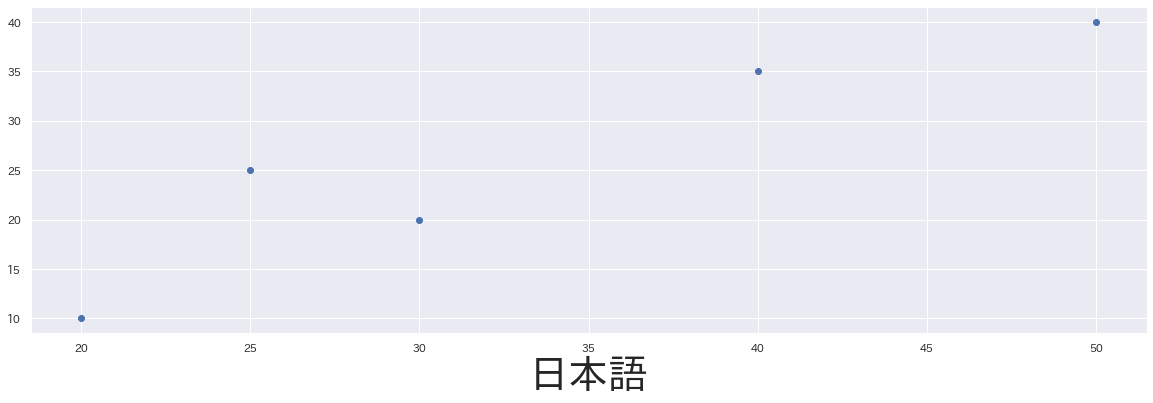

In [36]:
x = np.array([30, 20, 50, 40, 25]) # x のデータ
y = np.array([20, 10, 40, 35, 25]) # y のデータ
plt.figure(figsize=(20,6))
plt.xlabel("日本語", fontsize=40)
plt.plot(x, y, 'o') # 散布図を書く． 
plt.grid(True) #  grid（グラフの中にある縦線と横線）の表示　（sns.set()を行えば，デフォルトでTrueになる）

散布図の書き方は上の通りなのですが，教科書 ch.2.5.2 の1つめの例にある， xとyのデータの用意の仕方がちょっと一見では分かりづらいと思いますので，補足します．

まず， `np.random.randn(30)` ですが，　これは標準正規分布に従う乱数を30個生成しています．

In [4]:
x = np.random.randn(30) # 標準正規分布 N(0, 1) に従う値を30個生成
x # x　を表示

array([-0.453, -0.669, -2.236,  0.646, -0.056, -0.406, -0.115, -0.635,
        0.3  , -1.883,  0.415,  0.631,  0.779, -0.707,  0.219,  1.61 ,
       -0.036,  1.075, -0.709,  1.37 ,  0.27 ,  1.007, -2.303,  1.227,
       -0.624,  0.387,  1.425,  0.478, -0.334,  0.033])

次の `y = np.sin(x) + np.random.randn(30)`  ですが， 一つずつ説明します．

まず， `np.sin(x)` ですが，これはxの各要素にsin関数を適用しています．

In [5]:
y = np.sin(x) # x の各要素にsin関数を適用
y # y を表示

array([-0.438, -0.62 , -0.787,  0.602, -0.056, -0.395, -0.114, -0.593,
        0.296, -0.952,  0.403,  0.59 ,  0.703, -0.65 ,  0.217,  0.999,
       -0.036,  0.88 , -0.651,  0.98 ,  0.266,  0.845, -0.744,  0.941,
       -0.584,  0.378,  0.989,  0.46 , -0.328,  0.033])

このyの結果は，先ほど作成した変数 $x$ の各要素 $x_i$ に対して， sin($x_i$) を実行した結果となっています．  

`np.sin(x)` の動作についてもう少し分かりやすくみるために， $x=0$ と $x=\frac{\pi}{2}$ に対する $\sin(x)$ の結果を見てみましょう．   なお，以下のコードの `np.pi` は $\pi=3.141492...$ を表します．

In [6]:
y = np.sin(np.array([0, np.pi / 2])) # sin(0) と sin(π/2) の結果を計算
y # yを表示

array([0., 1.])

$\sin(0)=0$, $\sin(\frac{\pi}{2})=1$ となっていることが分かりますね．
- 参考: `np.sin()`のように，numpyが提供する関数の中には，ndarray型に対して関数を実行すると， 自動的に各要素に関数を適用し，その結果をndarray型として返す処理を行ってくれます． このような機能を備えたnumpyの関数をユニバーサル関数と呼びます．教科書の5章にもユニバーサル関数に関する説明が少しあります．

さて， `np.sin(x) + np.random.randn(30)` ですが， これは， `np.sin(x)` の結果それぞれの要素に対して， `np.random.randn()` で発生させた乱数を足しています．
たとえば， `np.sin(x) + np.random.randn(30)` の結果の1番目の要素は，  xの1番目の要素に対する $\sin(x_1)$の結果に 標準正規分布に従う乱数を足したものになっています． よく分からなければ，以下の2つのベクトル

In [7]:
np.sin(x) 

array([-0.438, -0.62 , -0.787,  0.602, -0.056, -0.395, -0.114, -0.593,
        0.296, -0.952,  0.403,  0.59 ,  0.703, -0.65 ,  0.217,  0.999,
       -0.036,  0.88 , -0.651,  0.98 ,  0.266,  0.845, -0.744,  0.941,
       -0.584,  0.378,  0.989,  0.46 , -0.328,  0.033])

と

In [8]:
np.random.randn(30)

array([ 0.139,  0.066,  0.805,  0.18 , -1.411,  1.379, -1.21 ,  0.42 ,
        0.346,  0.957, -0.16 ,  1.074, -0.15 , -2.078,  2.099, -0.391,
        0.029,  0.501, -1.043,  1.016, -0.924,  0.443,  1.413, -1.35 ,
        0.382, -0.944, -0.403,  0.776, -1.263, -0.53 ])

を要素ごとに足したベクトルが `np.sin(x) + np.random.randn(30)` の結果と解釈してもらった方が分かりやすいかもしれません．

## ch. 2.5.2  2つめの例

この例も，以下のコードが一見理解しづらいと思います．

まず， `np.arange(1000)` ですが， `np.arange(n)`は0からn-1まで1ずつ増えていくndarray型の配列を作成する関数です
- 参考: 数の初期値や増え方なども指定できます．デフォルトでは1ずつ増えていきます．

In [9]:
x = np.arange(100) # 0　から 99 までの配列を作成
x # x を表示

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

次の `np.random.randn(1000).cumsum()` ですが， `cumsum()` は， 配列の累積和を求める関数です． たとえば，

In [10]:
y = np.array([1,2,3,4,5]) 
y = y.cumsum() # y の累積和を計算して yに代入
y # y　を表示

array([ 1,  3,  6, 10, 15])

yの2番目の要素は3となっていますが， これは， xの1番目の要素と2番目の要素を足した結果であり， yの3番目の結果は，その結果にさらにxの3番目の要素を足した結果になっていますね．

さて， `np.random.randn(1000).cumsum()` に戻ると，これは，  `np.random.randn(1000)`  の累積和を求めていることが分かります．  `randn()`は平均0，標準偏差1の正規分布に従う乱数です．それらの累積和を求めるということは， 直感的には，
$\frac{1}{2}$の確率で正の方向に進み， $\frac{1}{2}$の確率で負の方向に進む操作を1000回繰り返したと考えることができます．
その結果，株価のような上がったり下がったりするようなデータが生成されているわけですね．

In [11]:
y = np.random.randn(100) # 標準正規分布に従う乱数100個生成
y # y を表示

array([ 2.177,  0.016,  1.082, -0.534, -1.636,  0.147,  1.418,  1.603,
       -0.543,  0.218,  0.945, -0.332,  0.228,  1.393,  0.951,  1.56 ,
        2.917,  1.794, -1.153,  0.072, -1.374,  1.364, -0.494,  0.121,
       -1.182, -2.632, -0.63 , -0.194, -1.325, -0.525, -1.624,  2.482,
        0.682,  0.4  , -0.642,  0.966,  0.162,  0.619,  1.688, -3.201,
        1.641,  0.779, -0.038,  0.538, -2.335, -0.005,  0.827, -0.007,
       -0.755,  2.978,  0.662,  0.841, -0.758, -0.714, -1.809,  0.567,
       -1.077,  1.095, -0.256,  1.082, -0.091,  1.548,  2.316, -0.698,
        0.246, -0.583, -0.74 , -1.538,  0.286, -0.045,  0.183, -0.748,
       -0.632, -1.102,  0.479,  0.375,  1.322,  0.722, -0.95 , -0.101,
        0.215, -1.875, -0.233,  0.894,  0.37 ,  0.616, -2.489, -0.012,
       -0.58 ,  0.697, -0.473, -0.3  ,  1.957, -0.656,  0.477, -0.803,
       -1.942,  1.042, -0.178, -0.283])

In [12]:
y = y.cumsum() # 標準正規分布に従う乱数100個生成
y # y を表示 一つ前のセルの結果と比べてみると良い．

array([ 2.177,  2.193,  3.275,  2.741,  1.105,  1.252,  2.67 ,  4.273,
        3.73 ,  3.948,  4.893,  4.562,  4.79 ,  6.182,  7.134,  8.694,
       11.611, 13.404, 12.251, 12.323, 10.949, 12.313, 11.818, 11.939,
       10.757,  8.126,  7.495,  7.302,  5.977,  5.452,  3.828,  6.31 ,
        6.992,  7.393,  6.751,  7.716,  7.878,  8.498, 10.186,  6.985,
        8.626,  9.405,  9.366,  9.904,  7.569,  7.564,  8.391,  8.383,
        7.628, 10.607, 11.269, 12.11 , 11.352, 10.638,  8.829,  9.396,
        8.318,  9.414,  9.158, 10.239, 10.149, 11.697, 14.014, 13.315,
       13.562, 12.979, 12.24 , 10.701, 10.988, 10.943, 11.126, 10.378,
        9.745,  8.643,  9.122,  9.496, 10.819, 11.541, 10.591, 10.489,
       10.705,  8.83 ,  8.597,  9.491,  9.861, 10.477,  7.988,  7.975,
        7.395,  8.093,  7.62 ,  7.32 ,  9.277,  8.622,  9.099,  8.295,
        6.353,  7.394,  7.216,  6.933])

というわけで，教科書ｃｈ．2.5.1の2つめの例を簡単にまとめると， 以下のようになります．（データの数は100個にしています）

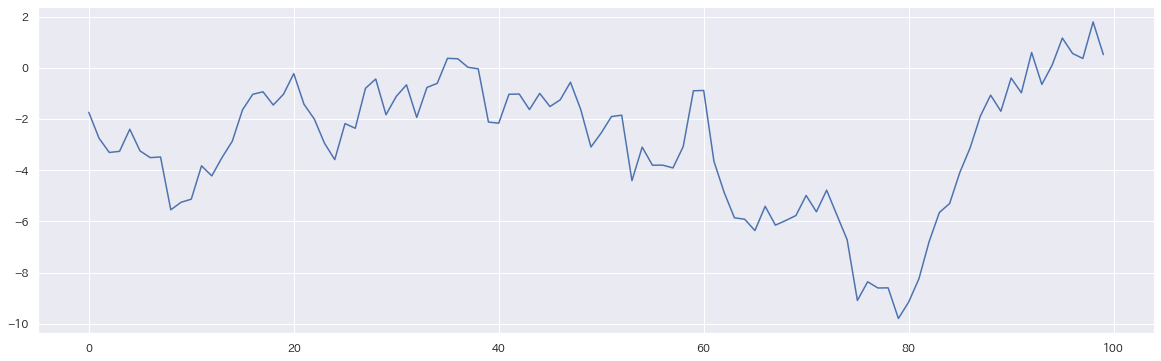

In [13]:
x = np.arange(100) # 0　から 99 までの配列を作成
y = np.random.randn(100).cumsum() # 標準正規分布に従う乱数100個生成し累積和を計算
plt.figure(figsize=(20,6))
plt.plot(x, y) # x と y　を表示
plt.grid(True) #  grid（グラフの中にある縦線と横線）の表示　（sns.set()を行えば，デフォルトでTrueになる）

なお， `plt.plot(x, y)` を `plt.plot(x, y, 'o')`  とすると，ｘとyの点のみが描画されます．

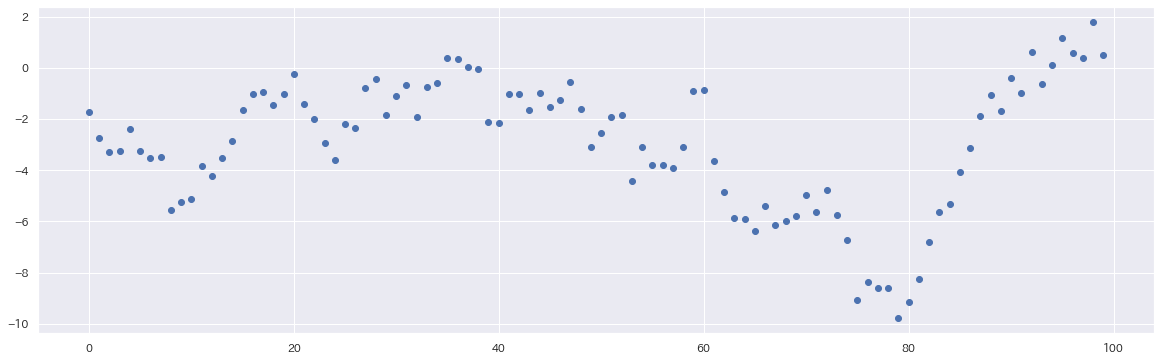

In [14]:
plt.figure(figsize=(20,6))
plt.plot(x, y, 'o') # さきほどと同じ x と y　を，今度は点だけ表示
plt.grid(True) #  grid（グラフの中にある縦線と横線）の表示　（sns.set()を行えば，デフォルトでTrueになる）

## ch.2.5.3 複数のグラフを重ねて表示する

ch.2.5.3では，グラフを複数表示する方法について説明されています． 他にも，1つの領域に複数のグラフを重ねて表示する方法もありますので，ここで説明しておきます．

今からする説明は 教科書の 練習問題 2-11 に対する解答となっています． 練習問題 2-11 は以下の内容です．

> 「$y = sin(x)$」と「$y = cos(x)$」のグラフを重ねて描いてください（$x$は-10から10の値）

まずは， x の値と， sin(x) と cos(x) の結果を用意します．

In [15]:
x = np.linspace(-10, 10, 100)  # -10 から 10　の区間を100等分した数字の配列を作成
y1 = np.sin(x)  # xの各要素に対して， sin(x) を適用
y2 = np.cos(x) # xの各要素に対して， cos(x) を適用

複数のグラフを重ねて表示するには，1つのセル中に複数の`plot()`を描けばグラフが重ねて表示されます．

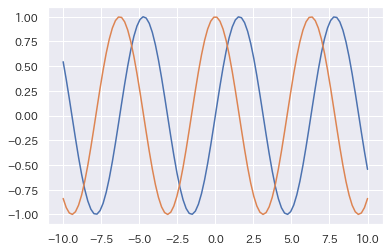

In [16]:
plt.plot(x, y1)  # sin(x) を描画
plt.plot(x, y2)  #  cos(x) をさら描画
plt.grid(True) #  grid（グラフの中にある縦線と横線）の表示　（sns.set()を行えば，デフォルトでTrueになる）

このように，2つのグラフが重ねて表示されます．

上記グラフは，どちらが`sin(x)`でどちらが`cos(x)`か分かりにくいので，凡例も表示してみましょう．

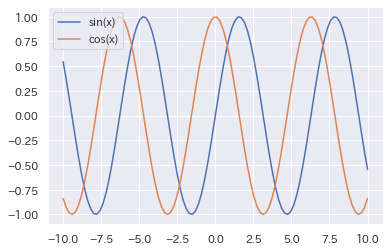

In [17]:
plt.plot(x, np.sin(x), label="sin(x)")  # 凡例に表示する用のラベル名を設定
plt.plot(x, np.cos(x), label="cos(x)")  # 凡例に表示する用のラベル名を設定
plt.legend() # 凡例を表示
plt.grid(True) #  grid（グラフの中にある縦線と横線）の表示　（sns.set()を行えば，デフォルトでTrueになる）

## ここから演習課題

- [ここにコードを書く] の箇所を修正してセルを完成していってください．
- 出力がなんか変だな，と思ったら メニューの Kernel -> Restart & Clean outputをしてノートブックの一番上からセルを順次実行していってみてください．

## 課題その1 散布図の描画



20名の学生に対して数学と英語の試験を実施した．数学と英語の成績をそれぞれ `math`, `english` という変数名にndarrayとして格納した．

In [18]:
math = np.array([75, 70, 63, 67, 57, 72, 63, 53, 68, 53, 64, 63, 69, 56, 52, 48, 65, 64, 58, 62])
english = np.array([80, 82, 77, 80, 69, 86, 86, 79, 79, 63, 85, 84, 86, 73, 66, 71, 73, 79, 72, 71])

この数学と英語の成績を散布図として表示せよ． x軸を数学の成績，y軸を英語の成績とし， x軸の座標名は `math`， y軸の座標名は`english` とせよ．

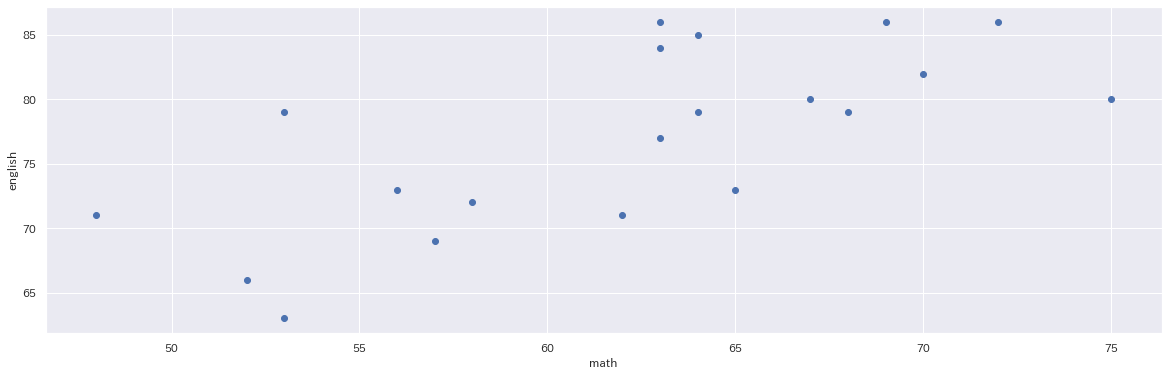

In [19]:
plt.figure(figsize=(20,6))
plt.plot(math, english, 'o') # 散布図を書く ch.2.5.2 参照． なお， 'o' の部分を 'x'  や 'rx' に変えるとマーカがいろいろ変わります
plt.xlabel('math') #x軸の座標名に math と表示する． ch.2.5.2 参照． 
plt.ylabel('english') # y軸の座標名に english と表示するch.2.5.2 参照． 
plt.grid(True) #  grid（グラフの中にある縦線と横線）の表示　（sns.set()を行えば，デフォルトでTrueになる）

`plot()`の3番目の引数に`'o'`という文字列を指定したと思いますが，ここでマーカの形や色，線の種類を指定することができます．興味がある人は以下のページの**Markers** 以降を参照してみてください．
 - https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html

演習とは関係ありませんが，数学と英語の相関係数についても求めてみましょう．2つのデータの相関係数を計算する方法はnumpy，scipy，pandasを使う方法さまざまありますが，ここでは，scipyの `stats.pearsonr()`関数を使用します． （教科書3.3.7.2 でも紹介されています）

In [20]:
import scipy as sp
sp.stats.pearsonr(math, english) # 数学と英語のピアソンの積率相関係数を計算する

(0.6977846636813478, 0.0006247415186865597)

なお， `stats.pearsonr()` 結果の返り値は `(相関係数, p値)`の組（tuple）となっています．ここでのp値は無相関の検定に対するp値です．  math と english の相関係数だけ取り出すには，

In [21]:
sp.stats.pearsonr(math, english)[0]

0.6977846636813478

とします． 

## 課題その2 関数の描画

$f(x) = x^2 - 4x + 3$ のグラフをかけ． $x$ の範囲は $-1 \leq x \leq 5$ とせよ．

week05 の演習課題では， $f(x) = x^2 - 4x + 3$ について，$f(x)=0$ となる $x$ をニュートン法により求めました．今回は，この関数 $f(x)$ をグラフで書いてみましょう．
まず， $f(x) = x^2 - 4x + 3$ を `my_function()` として 定義します． これは，week05の演習課題そのままです．

In [22]:
def my_function(x):
    return x**2 - 4 * x + 3 # f(x)を定義 (ch.2.3.3参照)

次に，グラフを書くときの $x$ の範囲について定義しましょう． $f(x)=0$の解は $x=1$ と $x=3$の2つですので，それらを含んだ範囲として， $-1 \leq x \leq 5$ の範囲でグラフを描画することを考えてみます．
`np.linspace()` という関数を使えば，ある範囲の等間隔な数字の配列を生成することができます． たとえば，  0から1を10等分した数字の配列を作成したければ，以下のようにします．

In [23]:
x = np.linspace(0, 1, 10) # 0 から 1　の区間を10等分した数字の配列を作成
x # x を表示

array([0.   , 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889,
       1.   ])

-1 から 1　へ 100等分したければ，  `np.linspace(-1, 1, 100)` のようにします．

In [24]:
x = np.linspace(-1, 1, 100) # -1 から 1　の区間を100等分した数字の配列を作成
x # x を表示

array([-1.   , -0.98 , -0.96 , -0.939, -0.919, -0.899, -0.879, -0.859,
       -0.838, -0.818, -0.798, -0.778, -0.758, -0.737, -0.717, -0.697,
       -0.677, -0.657, -0.636, -0.616, -0.596, -0.576, -0.556, -0.535,
       -0.515, -0.495, -0.475, -0.455, -0.434, -0.414, -0.394, -0.374,
       -0.354, -0.333, -0.313, -0.293, -0.273, -0.253, -0.232, -0.212,
       -0.192, -0.172, -0.152, -0.131, -0.111, -0.091, -0.071, -0.051,
       -0.03 , -0.01 ,  0.01 ,  0.03 ,  0.051,  0.071,  0.091,  0.111,
        0.131,  0.152,  0.172,  0.192,  0.212,  0.232,  0.253,  0.273,
        0.293,  0.313,  0.333,  0.354,  0.374,  0.394,  0.414,  0.434,
        0.455,  0.475,  0.495,  0.515,  0.535,  0.556,  0.576,  0.596,
        0.616,  0.636,  0.657,  0.677,  0.697,  0.717,  0.737,  0.758,
        0.778,  0.798,  0.818,  0.838,  0.859,  0.879,  0.899,  0.919,
        0.939,  0.96 ,  0.98 ,  1.   ])

さて，今回は  xの範囲を$-1$から$5$とします．区間は100等にしてみましょう．

In [25]:
x = np.linspace(-1, 5, 100) # -1 から 5　の区間を100等分した数字の配列を作成
x # x を表示

array([-1.   , -0.939, -0.879, -0.818, -0.758, -0.697, -0.636, -0.576,
       -0.515, -0.455, -0.394, -0.333, -0.273, -0.212, -0.152, -0.091,
       -0.03 ,  0.03 ,  0.091,  0.152,  0.212,  0.273,  0.333,  0.394,
        0.455,  0.515,  0.576,  0.636,  0.697,  0.758,  0.818,  0.879,
        0.939,  1.   ,  1.061,  1.121,  1.182,  1.242,  1.303,  1.364,
        1.424,  1.485,  1.545,  1.606,  1.667,  1.727,  1.788,  1.848,
        1.909,  1.97 ,  2.03 ,  2.091,  2.152,  2.212,  2.273,  2.333,
        2.394,  2.455,  2.515,  2.576,  2.636,  2.697,  2.758,  2.818,
        2.879,  2.939,  3.   ,  3.061,  3.121,  3.182,  3.242,  3.303,
        3.364,  3.424,  3.485,  3.545,  3.606,  3.667,  3.727,  3.788,
        3.848,  3.909,  3.97 ,  4.03 ,  4.091,  4.152,  4.212,  4.273,
        4.333,  4.394,  4.455,  4.515,  4.576,  4.636,  4.697,  4.758,
        4.818,  4.879,  4.939,  5.   ])

参考までに，この $x$ に対して， `my_function(x)` を実行した結果についても見てみます．

In [26]:
y = my_function(x) # x に対して my_function() を実行
y # y を表示

array([ 8.   ,  7.64 ,  7.287,  6.942,  6.604,  6.274,  5.95 ,  5.635,
        5.326,  5.025,  4.731,  4.444,  4.165,  3.893,  3.629,  3.372,
        3.122,  2.88 ,  2.645,  2.417,  2.197,  1.983,  1.778,  1.579,
        1.388,  1.205,  1.028,  0.86 ,  0.698,  0.544,  0.397,  0.257,
        0.125,  0.   , -0.118, -0.228, -0.331, -0.426, -0.514, -0.595,
       -0.669, -0.735, -0.793, -0.845, -0.889, -0.926, -0.955, -0.977,
       -0.992, -0.999, -0.999, -0.992, -0.977, -0.955, -0.926, -0.889,
       -0.845, -0.793, -0.735, -0.669, -0.595, -0.514, -0.426, -0.331,
       -0.228, -0.118,  0.   ,  0.125,  0.257,  0.397,  0.544,  0.698,
        0.86 ,  1.028,  1.205,  1.388,  1.579,  1.778,  1.983,  2.197,
        2.417,  2.645,  2.88 ,  3.122,  3.372,  3.629,  3.893,  4.165,
        4.444,  4.731,  5.025,  5.326,  5.635,  5.95 ,  6.274,  6.604,
        6.942,  7.287,  7.64 ,  8.   ])

さて， これで x と y の用意はできたのでグラフを描画してみます． x軸とy軸の座標名も設定してみましょう．

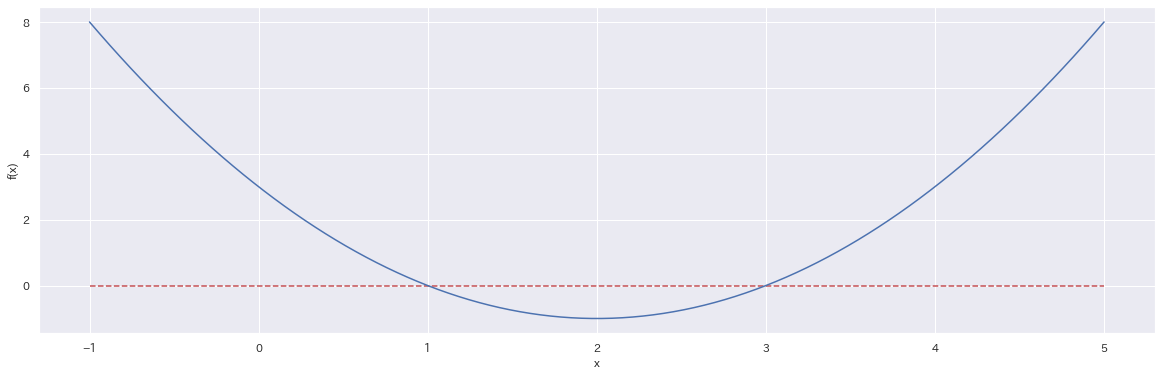

In [27]:
plt.figure(figsize=(20,6))
plt.plot(x, my_function(x))  # f(x)を描画 ch.2.5.4　参照
plt.hlines(y=0, xmin=-1, xmax=5, colors="r", linestyles="dashed") # y=0 に赤い補助線を引いてみる． hlines() は横線を引くための関数
plt.xlabel("x") # X軸の座標名に x と書く
plt.ylabel("f(x)") # y軸の座標名に f(x) と書く
plt.grid(True) #  grid（グラフの中にある縦線と横線）の表示　（sns.set()を行えば，デフォルトでTrueになる）

図が表示されましたでしょうか？ 図の結果からも $f(x)=0$ の解が $x=1$と$x=3$ であることが分かりますね．

なお， いまは x を $-1$ から $5$ の区間で100分割しましたが， もっと少ない分割でグラフを書いてみると，  `plot()`の挙動がよく分かります． ここでは，10分割してみまよう．

In [28]:
x = np.linspace(-1, 5, 10) # -1 から 5　の区間を10等分した数字の配列を作成
x # x を表示

array([-1.   , -0.333,  0.333,  1.   ,  1.667,  2.333,  3.   ,  3.667,
        4.333,  5.   ])

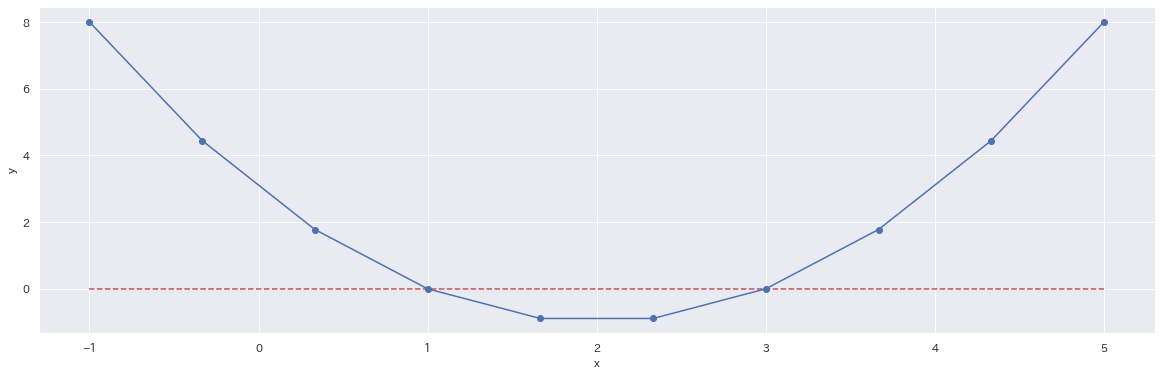

In [29]:
plt.figure(figsize=(20,6))
plt.plot(x, my_function(x), 'o-')  # f(x)を描画．　点を丸で表示し，点同士を直線で繋げる
plt.hlines(y=0, xmin=-1, xmax=5, colors="r", linestyles="dashed") # y=0 に補助線を引いてみる． hlines() は横線を引くための関数
plt.xlabel("x") # X軸のラベルに x と書く
plt.ylabel("y") # y軸のラベルに f(x) と書く
plt.grid(True)

先ほどの図とは異なり，ガタガタに見えるのではないでしょうか．これは， `plot()`は各点を順次繋いでいっているだけですので， 区間が粗いとこのような表示になります．

## 課題3. ヒストグラムの表示

課題3-1. 標準正規分布に従う乱数を10,000個作成し，ヒストグラムとして表示せよ．なお，ビンの個数は50個とし，表示するデータの範囲は-3から+3とせよ．

In [30]:
x = random.randn(10000) # 標準正規分布（平均0，分散1）に従う乱数を10,000個作成しxに代入 (ch.2.2.3)
x[:100] # x を先頭の100個だけ表示

array([ 0.126, -1.017, -0.288,  0.463,  0.599, -0.51 ,  0.472, -0.053,
        0.674,  0.949,  2.213, -2.015,  0.478, -0.666, -0.73 , -1.975,
       -0.36 , -0.708,  0.798, -2.203, -0.489, -0.581, -0.377,  2.255,
       -1.469,  0.835,  1.133,  0.745,  0.236, -1.21 , -0.455,  0.593,
       -1.25 , -0.372,  1.256, -1.43 , -0.378, -0.392, -1.57 ,  2.036,
       -0.02 ,  1.082, -1.361, -1.445,  0.657, -0.983, -0.817, -2.285,
       -0.411, -0.698, -0.417,  0.99 , -1.651,  0.435,  0.109,  1.047,
       -0.387,  0.256, -1.031,  2.773, -0.59 , -0.733,  1.965, -0.195,
        0.008,  1.244,  0.399, -0.643,  1.38 ,  0.169,  0.872, -1.691,
        1.255, -0.353,  0.447,  0.381,  0.971, -0.149, -0.882,  0.247,
       -1.302,  0.016, -0.893,  0.427, -0.707,  1.063,  0.155, -1.634,
        0.398, -0.87 , -1.986,  0.013,  0.617,  0.705,  0.923, -1.189,
       -0.341,  0.545,  0.699, -1.008])

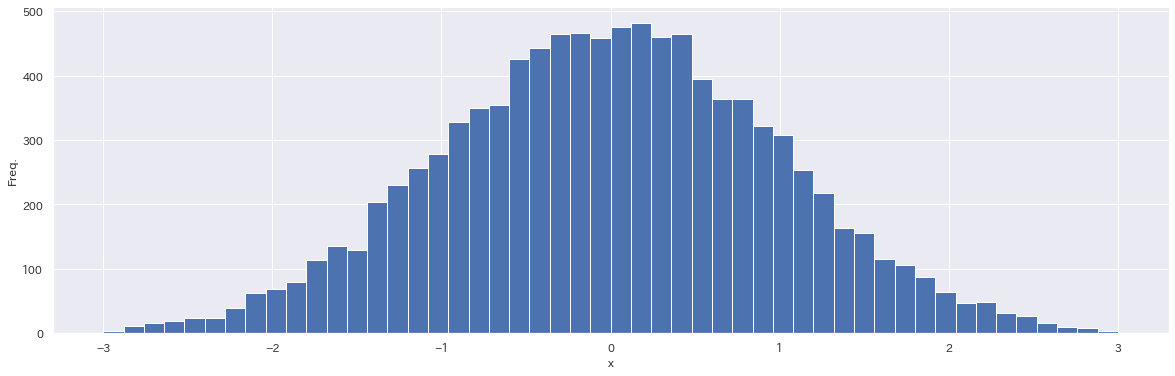

In [31]:
plt.figure(figsize=(20,6))
plt.hist(x, bins=50, range=(-3, 3)) # ヒストグラムを書く． ch2.5.5参照． ビンの個数は50，範囲は-3から3とせよ．
plt.xlabel("x") # x軸の座標名をxに設定
plt.ylabel("Freq.") #y軸の座標名をFreq.に設定
plt.grid(True) #  grid（グラフの中にある縦線と横線）の表示　（sns.set()を行えば，デフォルトでTrueになる）

乱数を10,000個も生成しているので，かなり正規分布に近い形になるのではと思います．

課題3-2. 標準正規分布に従う乱数を今度は100個作成し，ヒストグラムとして表示せよ．

ためしに，100個の乱数からヒストグラムを描いて見ましょう．　下記のセルを完成させ，実行する度にどのように変わるか確認してみてください．

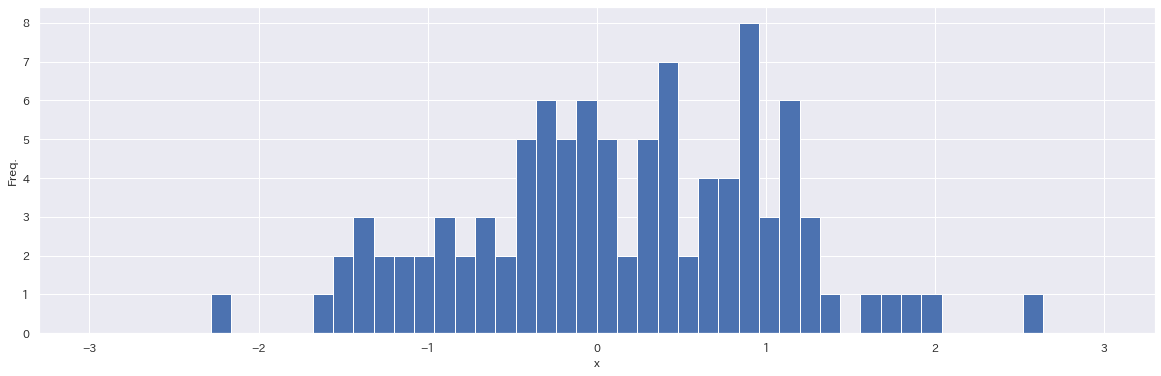

In [32]:
x = random.randn(100) # 標準正規分布（平均0，分散1）に従う乱数を100個作成しxに代入 (ch.2.2.3)
plt.figure(figsize=(20,6))
plt.hist(x, bins=50, range=(-3, 3)) # ヒストグラムを書く． ビンの個数は50， 範囲は-3から3とせよ．
plt.xlabel("x") # x軸の座標名をｘに設定
plt.ylabel("Freq.") #y軸の座標名をFreq.に設定
plt.grid(True) #  grid（グラフの中にある縦線と横線）の表示　（sns.set()を行えば，デフォルトでTrueになる）

今週の演習は以上です．  単にデータを与えるだけでなく，マーカの形，軸の座標名やx軸の範囲など，「可視化の手続きをプログラムで記述する」というグラフをプログラムで描くことのイメージをつかんでもらえたらと思います． 

可視化のライブラリはmatplotlibだけでなく，この教科書でも使われているseabornを始め様々なものがあります． たとえば， [plotly](https://plotly.com/)というライブラリを使えば，インタラクティブに動くグラフを簡単に作成することができます． 興味があればいろいろと調べてみてください．

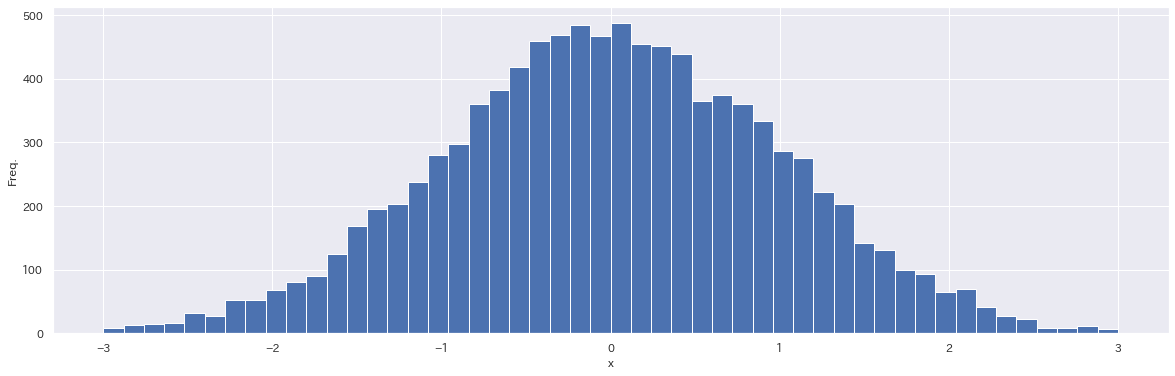

In [33]:
plt.figure(figsize=(20,6))
plt.hist(np.random.randn(10 ** 4), bins=50, range=(-3, 3)) # ヒストグラムを書く． ch2.5.5参照． ビンの個数は50，範囲は-3から3とせよ．
plt.xlabel("x") # x軸の座標名をxに設定
plt.ylabel("Freq.") #y軸の座標名をFreq.に設定
plt.grid(True) #  grid（グラフの中にある縦線と横線）の表示　（sns.set()を行えば，デフォルトでTrueになる）